In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Download historical stock data
data = yf.download("AAPL", start="2022-01-01", end="2024-12-31")
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Select useful features
data.dropna(inplace=True)


/tmp/ipython-input-2-2019063804.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2022-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [3]:
# Shift 'Close' column to get the next day's close as the label
data['Next_Close'] = data['Close'].shift(-1)

# Drop the last row (as it will have NaN for Next_Close)
data.dropna(inplace=True)

# Define features and target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


In [5]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [6]:
print("Random Forest Results:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Results:
MSE: 1086.3981208632965
R² Score: -4.422199271293955


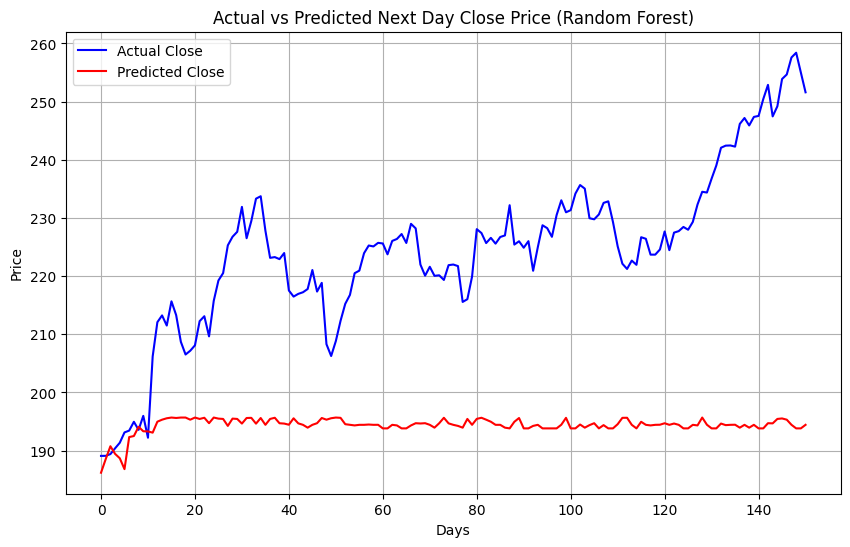

In [7]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Close', color='blue')
plt.plot(y_pred_rf, label='Predicted Close', color='red')
plt.title('Actual vs Predicted Next Day Close Price (Random Forest)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [8]:
import pickle

In [9]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model to disk
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [10]:
from sklearn.preprocessing import StandardScaler
import pickle

# Create and fit scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Save the scaler to disk
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [11]:
from google.colab import files

# Download model.pkl
files.download('model.pkl')

# Download scaler.pkl
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
!pip install streamlit numpy

  Using cached streamlit-1.46.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached watchdog-6.0.0-py3-none-manylinux2014_x86_64.whl.metadata (44 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
Using cached streamlit-1.46.0-py3-none-any.whl (10.1 MB)
Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)
Using cached watchdog-6.0.0-py3-none-manylinux2014_x86_64.whl (79 kB)


In [15]:
# stock_app.py

import streamlit as st
import numpy as np
import pickle

# Page config
st.set_page_config(page_title="Stock Price Predictor", layout="centered")

# Load model and scaler
try:
    model = pickle.load(open('stock_model.pkl', 'rb'))
    scaler = pickle.load(open('stock_scaler.pkl', 'rb'))
except Exception as e:
    st.error(f"❌ Error loading model or scaler: {e}")
    st.stop()

# Title
st.title("📈 Stock Price Predictor")
st.markdown("Predict the **next day's closing price** using Open, High, Low, and Volume.")

# Sidebar inputs
st.sidebar.header("📥 Enter Stock Market Data")
open_price = st.sidebar.number_input("Open Price", value=150.00, format="%.2f")
high_price = st.sidebar.number_input("High Price", value=155.00, format="%.2f")
low_price = st.sidebar.number_input("Low Price", value=148.00, format="%.2f")
volume = st.sidebar.number_input("Volume", value=1000000)

# Predict button
if st.sidebar.button("Predict Close Price"):
    # Prepare input
    input_data = np.array([[open_price, high_price, low_price, volume]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)

    # Show results
    st.subheader("📊 Predicted Next Close Price")
    st.success(f"${prediction[0]:.2f}")

    st.subheader("🔍 Input Summary")
    st.write(f"**Open:** ${open_price}")
    st.write(f"**High:** ${high_price}")
    st.write(f"**Low:** ${low_price}")
    st.write(f"**Volume:** {volume}")


2025-06-19 14:55:04.146 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 14:55:04.147 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 14:55:04.314 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-19 14:55:04.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 14:55:04.318 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 14:55:04.319 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-19 14:55:04.321 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

In [17]:
app_code = '''/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py'''

with open('app.py', 'w') as f:
    f.write(app_code)

from google.colab import files
files.download('app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>